In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [58]:
tested_data = pd.read_csv("GUIDE_Test.csv")

In [59]:
list(tested_data.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [60]:
pd.set_option('display.max_columns', None)
tested_data.head(5)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


DATACLEANING AND PREPROCESSING

In [61]:
tested_data.shape

(4147992, 46)

In [62]:
tested_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [63]:
tested_data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [64]:
threshold= len(tested_data)* 0.5   
tested_data=tested_data.dropna(thresh=threshold,axis=1)

In [65]:
tested_data.shape

(4147992, 36)

In [66]:
tested_data.duplicated().sum()

np.int64(225297)

In [67]:
tested_data.drop_duplicates(inplace=True)

In [68]:
tested_data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [69]:
tested_data.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

In [70]:
tested_data['Timestamp']=pd.to_datetime(tested_data['Timestamp'])

In [71]:
tested_data['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [72]:
tested_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1630942
TruePositive      1422856
FalsePositive      868897
Name: count, dtype: int64

In [73]:
tested_data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [74]:
tested_data.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06,3.922695e+06
mean,8.460813e+11,1.672382e+02,6.816684e+04,4.223519e+05,1.060836e+02,2.673215e+03,9.557739e+04,1.278995e+05,2.831923e+05,1.512210e+05,3.538441e+05,4.796591e+05,3.426203e+05,3.585862e+05,1.410906e+05,4.888493e+05,1.627333e+03,6.344917e+02,8.591662e+02,2.198089e+03,3.338514e+03,8.808010e+02,2.604752e+05,1.068323e+05,3.583399e+03,4.893778e+00,6.459252e+01,2.210860e+02,1.338802e+03,9.840989e+03
std,4.919382e+11,3.678578e+02,1.204018e+05,4.623677e+05,4.190355e+02,1.071732e+04,1.659185e+04,3.537271e+04,1.429193e+05,3.614132e+04,1.658293e+05,2.847006e+05,1.592405e+05,1.737347e+05,3.967719e+04,1.296834e+05,7.590552e+01,1.770122e+01,2.624437e+01,3.405457e+02,5.237770e+02,1.273373e+01,8.392960e+04,3.340397e+04,9.267115e+01,7.194654e-01,9.525676e+00,6.666060e+01,3.721316e+02,2.766539e+03
min,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.209068e+11,7.000000e+00,3.780000e+02,2.101500e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,1.266150e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.332237e+11,3.900000e+01,7.253000e+03,2.467610e+05,8.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.520000e+02,7.754600e+04,7.092510e+05,4.200000e+01,1.470000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.138000e+03,5.997000e+05,1.721457e+06,9.520000e+03,1.131690e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


EXPLORATORY DATA ANALYSIS

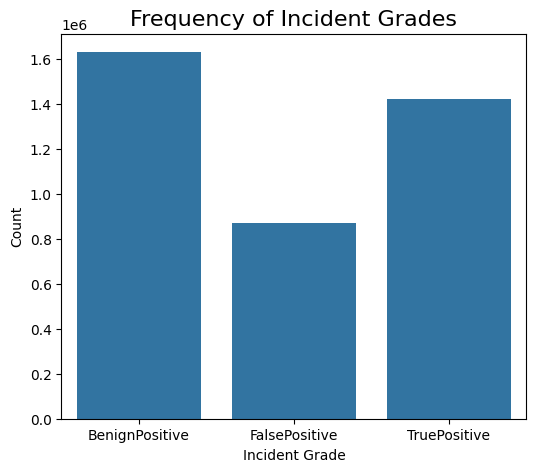

In [75]:
plt.figure(figsize=(6, 5))
sns.countplot(
    x="IncidentGrade",  
    data=tested_data,  
)
plt.title("Frequency of Incident Grades", fontsize=16)
plt.xlabel("Incident Grade", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

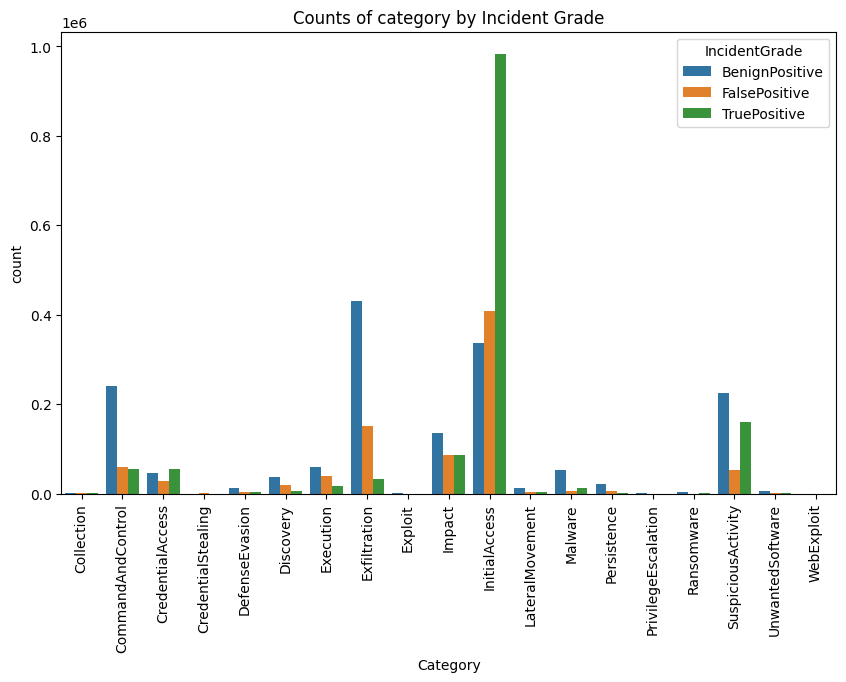

In [76]:
grouped_data=tested_data.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show() 

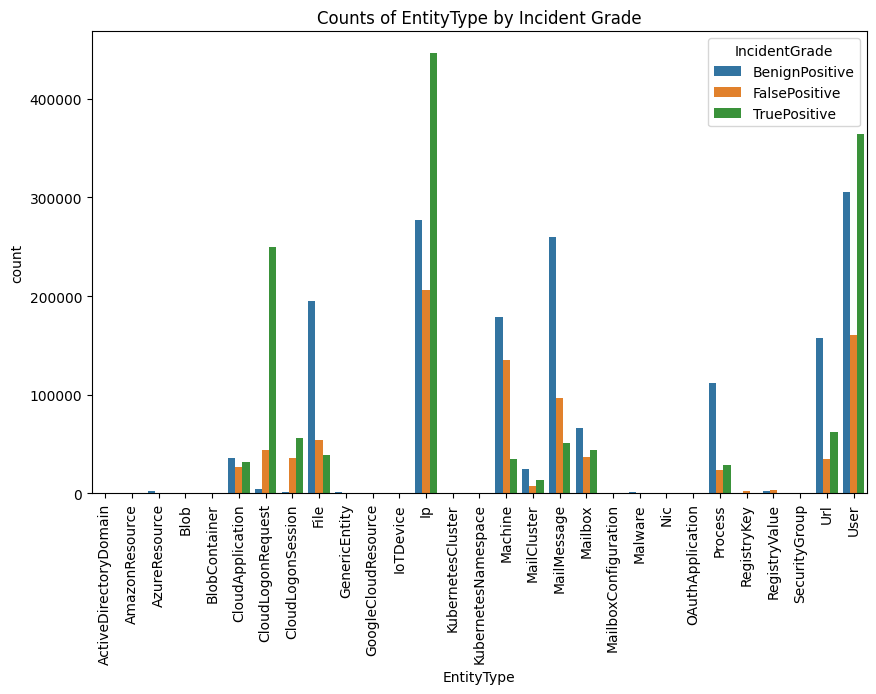

In [77]:
grouped_data=tested_data.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()

In [78]:
tested_data.drop(["DeviceName","DeviceId","ResourceIdName","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)

In [79]:
tested_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 31 columns):
 #   Column             Dtype              
---  ------             -----              
 0   Id                 int64              
 1   OrgId              int64              
 2   IncidentId         int64              
 3   AlertId            int64              
 4   Timestamp          datetime64[ns, UTC]
 5   DetectorId         int64              
 6   AlertTitle         int64              
 7   Category           object             
 8   IncidentGrade      object             
 9   EntityType         object             
 10  EvidenceRole       object             
 11  Sha256             int64              
 12  IpAddress          int64              
 13  Url                int64              
 14  AccountSid         int64              
 15  AccountUpn         int64              
 16  AccountObjectId    int64              
 17  AccountName        int64              
 18  Registr

FEATURE SELECTION AND CORRELATION

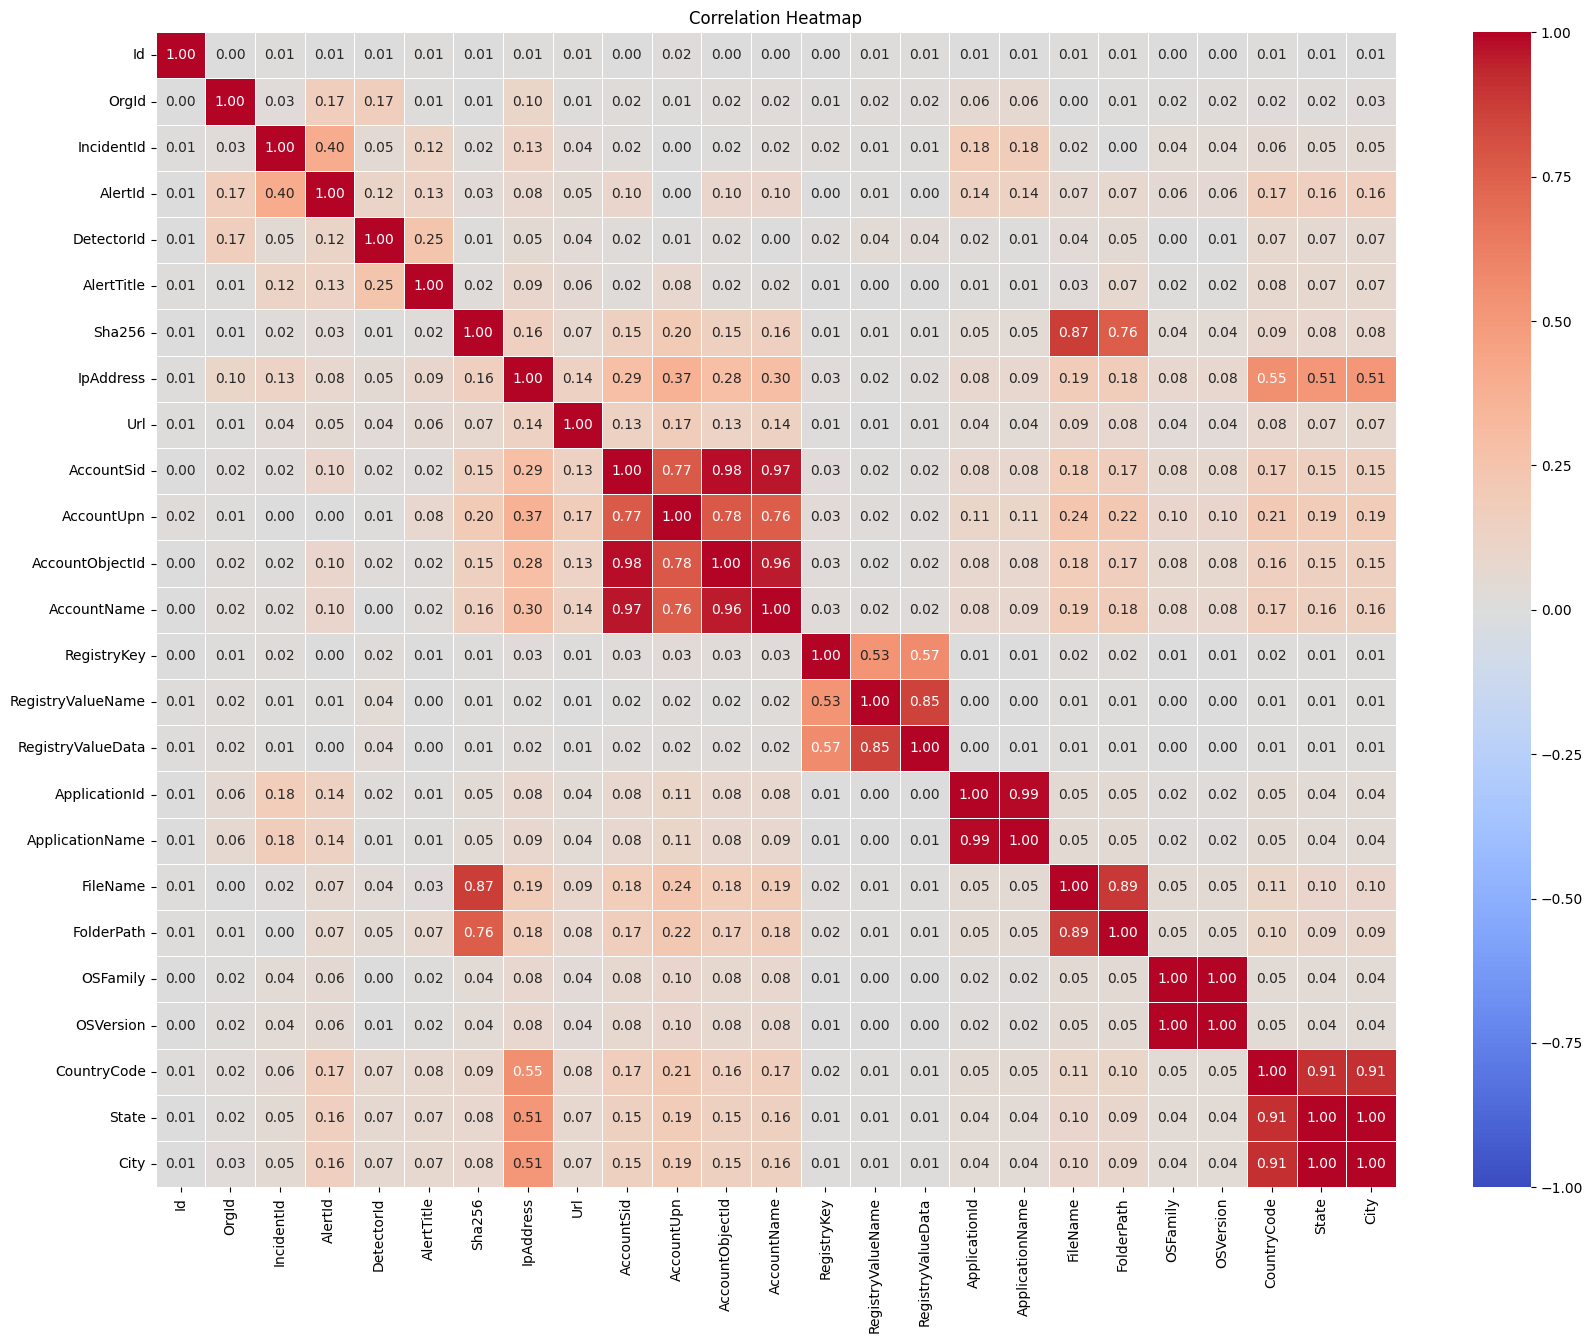

In [80]:
numeric_df=tested_data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [81]:
tested_data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)

In [82]:
tested_data.drop(["RegistryKey","RegistryValueData","DetectorId","Id","OrgId","IncidentId", "AlertId", "Timestamp",], axis =1 , inplace = True)

In [83]:
tested_data.drop(["OSFamily","OSVersion",'State','FileName','AccountName','IpAddress','Url','ApplicationId','Usage' ], axis =1 , inplace = True)

In [84]:
tested_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922695 entries, 0 to 4147990
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     int64 
 1   Category       object
 2   IncidentGrade  object
 3   EntityType     object
 4   EvidenceRole   object
 5   City           int64 
dtypes: int64(2), object(4)
memory usage: 209.5+ MB


ENCODING TECHNIQUE

In [85]:
tested_data.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole'], dtype='object')

In [86]:
Categorical_test=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

In [87]:
label_encoders = {}

for column in Categorical_test:
    le = LabelEncoder()
    tested_data[column] = le.fit_transform(tested_data[column])
    label_encoders[column] = le

In [88]:
tested_data.head()

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,City
0,563,11,0,28,0,10630
1,2,1,0,15,0,10630
2,10807,11,0,23,1,10630
3,0,10,1,7,1,10630
4,18,5,0,28,0,10630


In [89]:
tested_data.select_dtypes(include=["int32","int64"]).columns

Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'City'],
      dtype='object')

In [90]:
tested_data.to_csv('datatested.csv',index= False)

CHECKING IMBALANCED DATASET

In [91]:
tested_data.head()

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,City
0,563,11,0,28,0,10630
1,2,1,0,15,0,10630
2,10807,11,0,23,1,10630
3,0,10,1,7,1,10630
4,18,5,0,28,0,10630


In [92]:
X = tested_data.drop('IncidentGrade', axis=1)
y = tested_data['IncidentGrade']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [94]:
print("Class distribution before resampling:")
print(y_train.value_counts())

Class distribution before resampling:
IncidentGrade
0    1304754
2    1138285
1     695117
Name: count, dtype: int64


In [95]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
IncidentGrade
0    1304754
2    1304754
1    1304754
Name: count, dtype: int64


PREDICTING VALUES WITH PICKLED MODEL

In [96]:
with open('decision_tree_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [97]:
tested_data = pd.read_csv('datatested.csv')

In [98]:
tested_data = tested_data.dropna() 

In [99]:
X = tested_data.drop('IncidentGrade', axis=1)
y = tested_data['IncidentGrade']

In [100]:
X_train_smote, X_test, y_train_smote, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [101]:
expected_columns = model.feature_names_in_
X_test = X_test.reindex(columns=expected_columns, fill_value=0)

In [102]:
model= DecisionTreeClassifier()
model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [103]:
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')  
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_macro = f1_score(y_test, y_test_pred, average='macro')

metrics_summary_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
    'Testing Score': [test_accuracy, test_precision, test_recall, test_f1_macro]
})

print("\nDecision Tree - Training and Testing Metrics:")
print(metrics_summary_rf)



Decision Tree - Training and Testing Metrics:
              Metric  Testing Score
0           Accuracy       0.796858
1  Precision (Macro)       0.801834
2     Recall (Macro)       0.766878
3   F1 Score (Macro)       0.777750


In [105]:
y_test_prob = model.predict_proba(X_test)  
print(y_test_prob)

[[0.0126421  0.09395825 0.89339965]
 [0.01700103 0.36298574 0.62001322]
 [0.61578227 0.         0.38421773]
 ...
 [0.69285098 0.13741747 0.16973154]
 [0.01257565 0.09385852 0.89356583]
 [0.06481481 0.62037037 0.31481481]]


In [108]:
X_test = pd.DataFrame([[560,11,	24,0,10630],[5,	1,11,0,10630]], columns=["AlertTitle","Category","EntityType","EvidenceRole","City"])

y_test_pred = model.predict(X_test)
print(f"Predicted Target Values: {y_test_pred}")

Predicted Target Values: [0 2]
